<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = '13. estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r'), 'lxml')

In [ ]:
# visualize os resultados

fonte

In [3]:
# manipulando os dados
nome_estados_bruto = fonte.find_all('nome')
sigla_estados_bruto = fonte.find_all('sigla')
regiao_estados_bruto = fonte.find_all('regiao')

# continue o codigo aqui

In [ ]:
nome_estados_bruto

In [5]:
# limpando o nome dos estados

nome_estados_limpo = []

for nome_bruto in nome_estados_bruto:
  nome_limpo = nome_bruto.get_text()
  nome_estados_limpo.append(nome_limpo)
  

In [6]:
# limpando a sigla dos estados

sigla_estados_limpo = []

for sigla_bruto in sigla_estados_bruto:
  sigla_limpo = sigla_bruto.get_text()
  sigla_estados_limpo.append(sigla_limpo)

In [7]:
# limpando a regiao dos estados

regiao_estados_limpo = []

for regiao_bruto in regiao_estados_bruto:
  regiao_limpo = regiao_bruto.get_text()
  regiao_estados_limpo.append(regiao_limpo)

In [8]:
# criando o dicionario com as listas limpas

estados_limpo_dic = {
    'UF' : nome_estados_limpo,
    'sigla' : sigla_estados_limpo,
    'regiao' : regiao_estados_limpo
}

In [ ]:
estados_limpo_dic

In [10]:
# criando o dataframe a partir do dicionario para exportar como csv

import pandas as pd

estados_limpo = pd.DataFrame(estados_limpo_dic)

In [11]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

estados_limpo.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)

### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [12]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = '13. cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE)

In [20]:
# removendo o til(~) para não dar problema no JOIN

fonte['UF'] = fonte['UF'].replace(['SÃO PAULO'], 'SAO PAULO')

In [22]:
cidades_limpo = fonte.query('Censo == 2010').loc[:, ['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]

In [23]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

cidades_limpo.to_csv(NOME_ARQUIVO_DESTINO, index = False, sep=';')

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [24]:
brasil = pd.merge(left=cidades_limpo, right=estados_limpo, on='UF', how='right')

In [25]:
brasil.to_csv('brasil.csv', index = False, sep = ';')

---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [26]:
brasil_df = pd.read_csv('brasil.csv', sep=';')

In [ ]:
brasil_df

### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [28]:
# código para responder a pergunta

top_10_cidades = brasil.sort_values(['Pop_est_2009'], ascending=False).head(10)
top_10_cidades

,UF,nome,PIB,Pop_est_2009,PIB_percapita,sigla,regiao
2709,SAO PAULO,São Paulo,389317152.0,11037593.0,35271.929688,SP,SUDESTE
1104,RIO DE JANEIRO,Rio de Janeiro,175739344.0,6186710.0,28405.949219,RJ,SUDESTE
231,BAHIA,Salvador,32824228.0,2998056.0,10948.500000,BA,NORDESTE
604,DISTRITO FEDERAL,Brasília,131487264.0,2606885.0,50438.460938,DF,CENTRO-OESTE
3753,MINAS GERAIS,Belo Horizonte,44595204.0,2452617.0,18182.699219,MG,SUDESTE
127,AMAZONAS,Manaus,40486108.0,1738641.0,23286.060547,AM,NORTE
1026,PERNAMBUCO,Recife,24835340.0,1561659.0,15903.179688,PE,NORDESTE
1431,RIO GRANDE DO SUL,Porto Alegre,37787912.0,1436123.0,26312.449219,RS,SUL
2661,SAO PAULO,Guarulhos,32473828.0,1299283.0,24993.650391,SP,SUDESTE
2778,SAO PAULO,Campinas,31654720.0,1064669.0,29731.980469,SP,SUDESTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [29]:
# código para responder a pergunta

menores_5_pibs_nordeste = brasil[brasil['regiao'] == 'NORDESTE'].sort_values(['PIB_percapita'], ascending=True).head(5)
menores_5_pibs_nordeste

,UF,nome,PIB,Pop_est_2009,PIB_percapita,sigla,regiao
549,BAHIA,Caetanos,30036.105469,12307.0,2440.570068,BA,NORDESTE
556,BAHIA,Novo Triunfo,36864.132812,14763.0,2497.060059,BA,NORDESTE
447,BAHIA,Matina,33801.074219,13245.0,2551.989990,BA,NORDESTE
57,ALAGOAS,Traipu,68499.687500,25854.0,2649.479980,AL,NORDESTE
398,BAHIA,Mansidão,32635.740234,12244.0,2665.449951,BA,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [36]:
# código para responder a pergunta

PIB_SP = brasil[brasil['UF'] == 'SAO PAULO'].sort_values(['PIB'], ascending=True).head(15)
PIB_SP

,UF,nome,PIB,Pop_est_2009,PIB_percapita,sigla,regiao
2370,SAO PAULO,Nova Guataporanga,15150.568359,2184.0,6937.069824,SP,SUDESTE
2393,SAO PAULO,Fernão,15919.247070,1521.0,10466.299805,SP,SUDESTE
2194,SAO PAULO,Vitória Brasil,17446.894531,1662.0,10497.530273,SP,SUDESTE
2444,SAO PAULO,Pracinha,17830.343750,3271.0,5451.040039,SP,SUDESTE
2779,SAO PAULO,Torre de Pedra,17932.009766,3149.0,5694.509766,SP,SUDESTE
2768,SAO PAULO,Trabiju,18223.984375,1519.0,11997.360352,SP,SUDESTE
2395,SAO PAULO,Aspásia,18543.806641,1826.0,10155.429688,SP,SUDESTE
2385,SAO PAULO,Santana da Ponte Pensa,19317.396484,1616.0,11953.830078,SP,SUDESTE
2776,SAO PAULO,Guarani d'Oeste,19317.535156,2017.0,9577.360352,SP,SUDESTE
2689,SAO PAULO,Itaóca,21155.917969,3143.0,6731.120117,SP,SUDESTE


 - Qual é o PIB do estado de Santa Catarina?

In [30]:
# código para responder a pergunta

PIB_SC = brasil[brasil['UF'] == 'SANTA CATARINA'].groupby('UF').sum().PIB
PIB_SC

UF
SANTA CATARINA    1.298063e+08
Name: PIB, dtype: float64

 - Qual é o população da região sul?

In [31]:
# código para responder a pergunta
Pop_Sul = brasil[brasil['regiao'] == 'SUL'].groupby('regiao').sum().Pop_est_2009
Pop_Sul

regiao
SUL    17032871.0
Name: Pop_est_2009, dtype: float64

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [32]:
# código para responder a pergunta
PIB_AVG_MS = brasil[brasil['UF'] == 'MATO GROSSO DO SUL'].groupby('UF').mean().PIB_percapita
PIB_AVG_MS

UF
MATO GROSSO DO SUL    14458.89686
Name: PIB_percapita, dtype: float64

 - Qual é a população do Brasil?

In [33]:
# código para responder a pergunta
Pop_Brasil = brasil.sum().Pop_est_2009
Pop_Brasil

143185757.0

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

In [ ]:
cidades_menos_populosas = brasil.sort_values(['Pop_est_2009'], ascending=True).head(10).loc[:,['nome','Pop_est_2009']]
cidades_menos_populosas

,nome,Pop_est_2009
2862,Serra da Saudade,890.0
778,Araguainha,1115.0
2229,Oliveira de Fátima,1129.0
2372,Cedro do Abaeté,1221.0
2263,Chapada de Areia,1273.0
1575,André da Rocha,1276.0
2240,Crixás do Tocantins,1289.0
2096,Santiago do Sul,1443.0
818,Serra Nova Dourada,1447.0
1351,Engenho Velho,1467.0


 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [ ]:
nomes_cidades

2862       Serra da Saudade
778              Araguainha
2229     Oliveira de Fátima
2372        Cedro do Abaeté
2263       Chapada de Areia
1575         André da Rocha
2240    Crixás do Tocantins
2096        Santiago do Sul
818      Serra Nova Dourada
1351          Engenho Velho
Name: nome, dtype: object

[Text(0, 0, 'Serra da Saudade'),
 Text(0, 0, 'Araguainha'),
 Text(0, 0, 'Oliveira de Fátima'),
 Text(0, 0, 'Cedro do Abaeté'),
 Text(0, 0, 'Chapada de Areia'),
 Text(0, 0, 'André da Rocha'),
 Text(0, 0, 'Crixás do Tocantins'),
 Text(0, 0, 'Santiago do Sul'),
 Text(0, 0, 'Serra Nova Dourada'),
 Text(0, 0, 'Engenho Velho')]

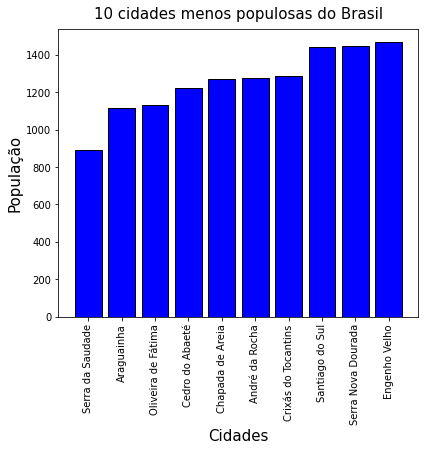

In [ ]:
# código para gerar a visualização

import matplotlib.pyplot as plt

cidades_menos_populosas = brasil.sort_values(['Pop_est_2009'], ascending=True).head(10).loc[:,['nome','Pop_est_2009']]
nomes_cidades = cidades_menos_populosas['nome']
populacao = cidades_menos_populosas['Pop_est_2009']

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
indice = range(10)

eixo.bar(indice, populacao, color='b', edgecolor='black')
eixo.set_title('10 cidades menos populosas do Brasil', fontsize=15, pad=10)
eixo.set_xlabel('Cidades', fontsize=15)
eixo.set_ylabel('População', fontsize=15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nomes_cidades, rotation=90)

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [ ]:
pop_regiao

,PIB,Pop_est_2009,PIB_percapita
regiao,,,
CENTRO-OESTE,2.232597e+08,7847630.0,3.943806e+06
NORDESTE,2.840419e+08,31675655.0,5.706700e+06
NORTE,7.716555e+07,5798051.0,2.094900e+06
SUDESTE,7.076959e+08,39531293.0,1.113814e+07
SUL,3.456701e+08,17032871.0,1.321814e+07


In [ ]:
nome_regioes

'CENTRO-OESTE'

Text(0.5, 1.0, 'População por região')

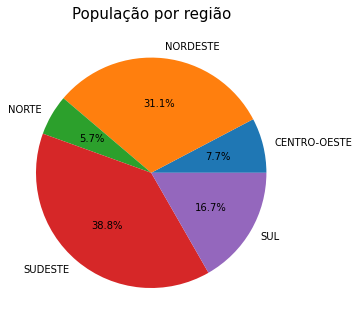

In [ ]:
# código para gerar a visualização

pop_regiao =  brasil.groupby('regiao').sum()
nome_regioes = pop_regiao.index
pop_regioes = pop_regiao['Pop_est_2009']

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.pie(pop_regioes, labels=nome_regioes, autopct='%.1f%%')
eixo.set_title('População por região', size=15, pad=10)